#KaggleHub

In [2]:
import kagglehub

path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/titanic-dataset


#Import the required libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Import the Dataset

In [4]:
# Load dataset
df = pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")

# Show top rows
print(df.head())

# Info and null check
print(df.info())
print(df.isnull().sum())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

#Handle Missing Values

 Filling missing 'Age' values with the median to avoid skewing the data

In [6]:
df['Age'].fillna(df['Age'].median(), inplace=True)

/tmp/ipython-input-6-10313347.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


 Fill 'Embarked' with mode

In [7]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-7-3744086084.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


 Drop 'Cabin' (too many nulls)

In [12]:
df.drop(columns='Cabin', inplace=True, errors='ignore')

In [13]:
print("Columns in dataset:", df.columns.tolist())


Columns in dataset: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']


#Convert Categorical to Numerical

Encode 'Sex' and 'Embarked'

In [14]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


#Normalize/Standardize Numerical Features

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

#Visualize Outliers and Remove if Needed

Survival rate by gender

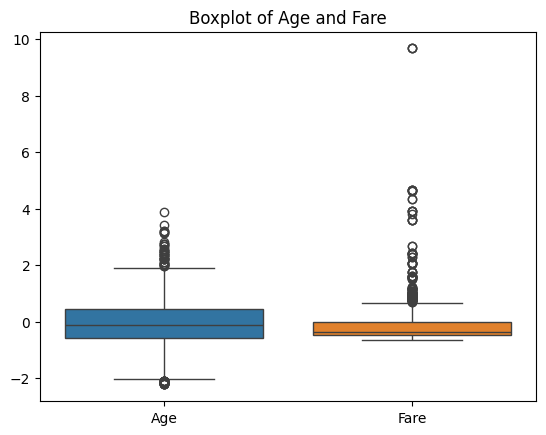

In [19]:
# Boxplot
sns.boxplot(data=df[['Age', 'Fare']])
plt.title("Boxplot of Age and Fare")
plt.show()

# Remove top 5% outliers in Fare
df = df[df['Fare'] < df['Fare'].quantile(0.95)]


Only include numeric columns for correlation matrix

#Exploratory Data Analysis

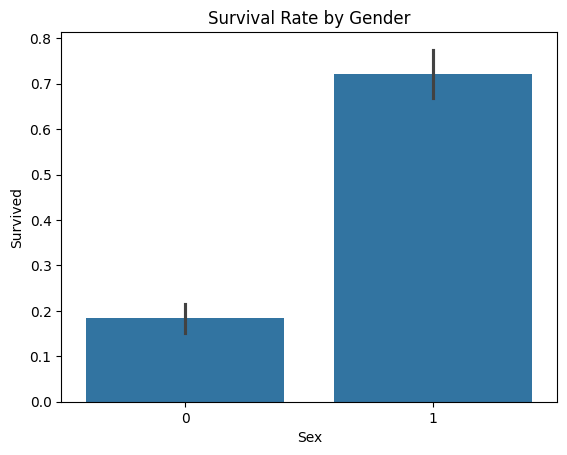

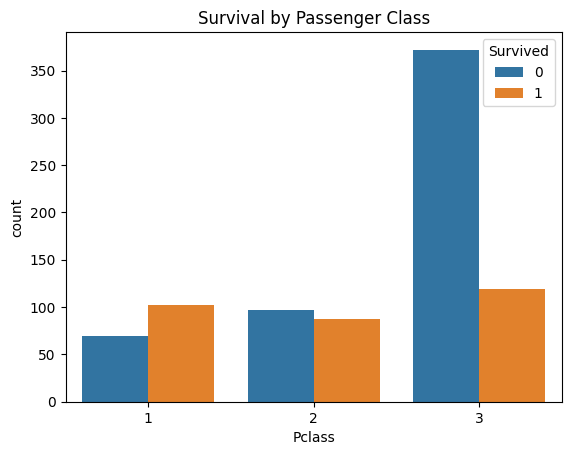

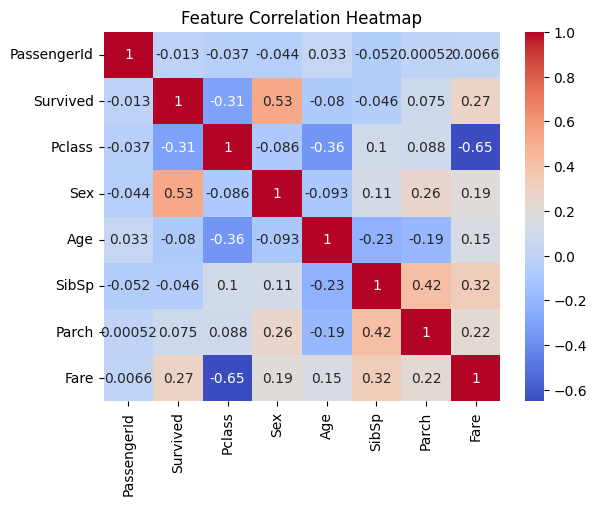

In [20]:
sns.barplot(data=df, x='Sex', y='Survived')
plt.title("Survival Rate by Gender")
plt.show()

sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title("Survival by Passenger Class")
plt.show()

# Only numeric data for heatmap
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


##New cleaned Dataset

In [21]:
df.to_csv('titanic_cleaned.csv', index=False)